## we will analyze the Titanic data set and make two predictions. One prediction to see which passengers on board the ship would survive and then another prediction to see if we would’ve survived.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC , LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## look at what data is actually missing

In [ ]:
total = data_train.isnull().sum().sort_values(ascending=False)
percent_1 = data_train.isnull().sum()/data_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [ ]:
data_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### What features could contribute to a high survival rate ?

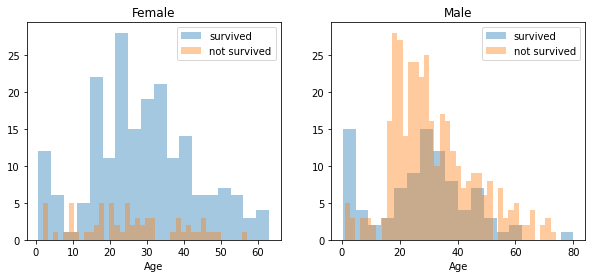

In [ ]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data_train[data_train['Sex']=='female']
men = data_train[data_train['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

### Pclass

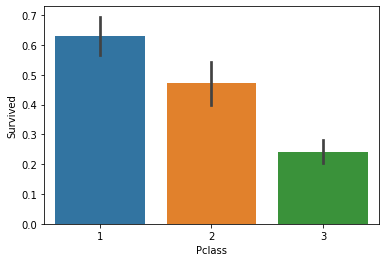

In [ ]:
sns.barplot(x='Pclass' , y='Survived',data=data_train)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


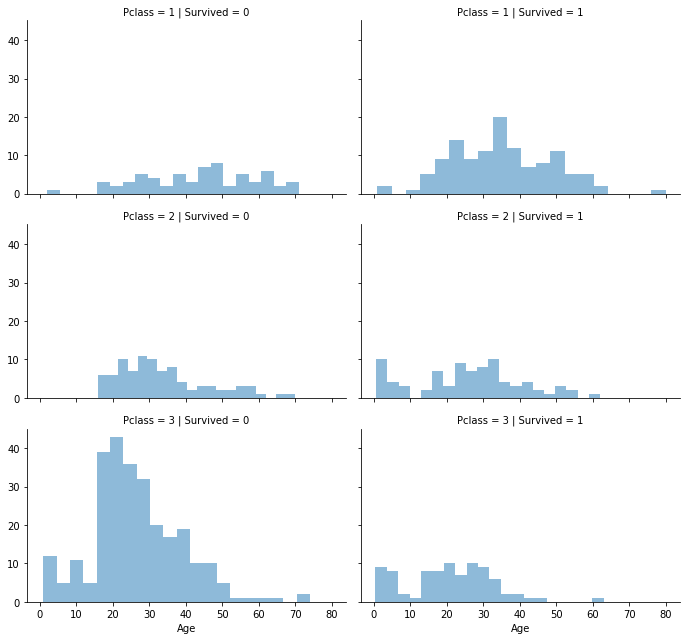

In [ ]:
grd = sns.FacetGrid(data_train,row='Pclass', col='Survived',size=3,aspect=1.6)
grd.map(plt.hist,'Age',alpha =.5,bins=20)
grd.add_legend()

## Data Preprocessing

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### In Cabin No of Values Missing

In [ ]:
del data_train['Cabin']

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
del data_test['Cabin'] 

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


## Age 

 ### Calculate mean and fill missing Values

In [ ]:
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].mean())

In [ ]:
data_train= data_train.dropna()

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
del data_train['Name']

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 76.4+ KB


In [ ]:
lb_make = LabelEncoder()
data_train["Sex"] = lb_make.fit_transform(data_train["Sex"])
data_train[["Sex"]].head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sex
0,1
1,0
2,0
3,0
4,1


In [ ]:
data_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,0,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,0,35.000000,1,0,113803,53.1000,S
4,5,0,3,1,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,211536,13.0000,S
887,888,1,1,0,19.000000,0,0,112053,30.0000,S
888,889,0,3,0,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,1,26.000000,0,0,111369,30.0000,C


In [ ]:
dummies = pd.get_dummies(data_train["Embarked"])
dummies.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
data_train = pd.concat([data_train , dummies],axis=1)
data_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
0,1,0,3,1,22.000000,1,0,A/5 21171,7.2500,S,0,0,1
1,2,1,1,0,38.000000,1,0,PC 17599,71.2833,C,1,0,0
2,3,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,0,35.000000,1,0,113803,53.1000,S,0,0,1
4,5,0,3,1,35.000000,0,0,373450,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,211536,13.0000,S,0,0,1
887,888,1,1,0,19.000000,0,0,112053,30.0000,S,0,0,1
888,889,0,3,0,29.699118,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,1,26.000000,0,0,111369,30.0000,C,1,0,0


In [ ]:
del data_train['Embarked']

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   C            889 non-null    uint8  
 10  Q            889 non-null    uint8  
 11  S            889 non-null    uint8  
dtypes: float64(2), int64(6), object(1), uint8(3)
memory usage: 72.1+ KB


In [ ]:
del data_train['Ticket']

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   C            889 non-null    uint8  
 9   Q            889 non-null    uint8  
 10  S            889 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 65.1 KB


In [ ]:
ID = data_train["PassengerId"]

In [ ]:
del data_train["PassengerId"] 

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   C         889 non-null    uint8  
 8   Q         889 non-null    uint8  
 9   S         889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [ ]:
data_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
C           0
Q           0
S           0
dtype: int64

## Testing Dataset

In [ ]:
data_test['Age'] = data_test['Age'].fillna(data_test['Age'].mean())

In [ ]:
data_test= data_test.dropna()

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [ ]:
del data_test['Name']

In [ ]:
lb_make_test = LabelEncoder()
data_test["Sex"] = lb_make_test.fit_transform(data_test["Sex"])
data_test[["Sex"]].head(5)

,Sex
0,1
1,0
2,1
3,1
4,0


In [ ]:
dummies_test = pd.get_dummies(data_test["Embarked"])
dummies_test.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [ ]:
data_test = pd.concat([data_test , dummies_test],axis=1)
data_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
0,892,3,1,34.50000,0,0,330911,7.8292,Q,0,1,0
1,893,3,0,47.00000,1,0,363272,7.0000,S,0,0,1
2,894,2,1,62.00000,0,0,240276,9.6875,Q,0,1,0
3,895,3,1,27.00000,0,0,315154,8.6625,S,0,0,1
4,896,3,0,22.00000,1,1,3101298,12.2875,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,A.5. 3236,8.0500,S,0,0,1
414,1306,1,0,39.00000,0,0,PC 17758,108.9000,C,1,0,0
415,1307,3,1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,0,0,1
416,1308,3,1,30.27259,0,0,359309,8.0500,S,0,0,1


In [ ]:
del data_test['Embarked']
del data_test['Ticket']

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Sex          417 non-null    int64  
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Fare         417 non-null    float64
 7   C            417 non-null    uint8  
 8   Q            417 non-null    uint8  
 9   S            417 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 27.3 KB


In [ ]:
del data_test['PassengerId']

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  417 non-null    int64  
 1   Sex     417 non-null    int64  
 2   Age     417 non-null    float64
 3   SibSp   417 non-null    int64  
 4   Parch   417 non-null    int64  
 5   Fare    417 non-null    float64
 6   C       417 non-null    uint8  
 7   Q       417 non-null    uint8  
 8   S       417 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 24.0 KB


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   C         889 non-null    uint8  
 8   Q         889 non-null    uint8  
 9   S         889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


## Bulding Model

In [ ]:
surv =  data_train["Survived"]

In [ ]:
X = data_train.drop("Survived",1)

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [ ]:
Y = data_train["Survived"]
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Logistics Regression


In [ ]:
logreg = LogisticRegression()
logreg.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred = logreg.predict(data_test)
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
acc_log = round(logreg.score(X, Y) * 100, 2)
print("Accuracy Of Logistics Regression is :",acc_log)

Accuracy Of Logistics Regression is : 80.09


## KNN

In [ ]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X, Y)
Y_pred = knn.predict(data_test)  
acc_knn = round(knn.score(X, Y) * 100, 2)
print("Accuracy Of KNN is :",acc_knn)

Accuracy Of KNN is : 83.58


##Linear Support Vector Machine

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X, Y)

Y_pred_SVC = linear_svc.predict(data_test)

acc_linear_svc = round(linear_svc.score(X, Y) * 100, 2)
print("Accuracy Of Linear Support Vector Machine is :",acc_linear_svc)

Accuracy Of Linear Support Vector Machine is : 78.52


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Decision tree Classifier

In [ ]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X, Y)

Y_pred_dec = decision_tree.predict(data_test)  
acc_decision_tree = round(decision_tree.score(X, Y) * 100, 2)
print("Accuracy Of Decision tree Classifier is :",acc_decision_tree)


Accuracy Of Decision tree Classifier is : 98.2


## Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)

Y_pred_RF = random_forest.predict(data_test)

random_forest.score(X, Y)
acc_random_forest = round(random_forest.score(X, Y) * 100, 2)
print("Accuracy Of Random Forest is :",acc_random_forest)

Accuracy Of Random Forest is : 98.2


## Which is the best Model ?

In [ ]:
Model_chk = pd.DataFrame({'Models': ['Logistic Regression','KNN',
                                    'Support Vector Machines','Decision Tree',
                                    'Random Forest'],
    'Score': [acc_log, acc_knn, acc_linear_svc, 
              acc_decision_tree,acc_random_forest]})
Model_chk_df = Model_chk.sort_values(by='Score', ascending=False)
Model_chk_df = Model_chk_df.set_index('Score')
Model_chk_df.head(9)

,Models
Score,
98.20,Decision Tree
98.20,Random Forest
83.58,KNN
80.09,Logistic Regression
78.52,Support Vector Machines


## Feature Importance
   
   ### Decision Tree

In [ ]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(decision_tree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.307
Age,0.249
Fare,0.232
Pclass,0.109
SibSp,0.051
Parch,0.029
S,0.011
Q,0.007
C,0.005


### Random forest

In [ ]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.268
Age,0.266
Fare,0.262
Pclass,0.081
SibSp,0.049
Parch,0.038
C,0.014
S,0.014
Q,0.008


### Create CSV File
**Training Dataset **

In [ ]:
df = pd.DataFrame({}).to_csv("Titanic_pred_Output.csv")

#####Using Decision Tree Algo

In [ ]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X, Y)

Y_pred_dec_x = decision_tree.predict(X)  
Y_pred_dec_x

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y , Y_pred_dec_x)
print(cm1)

[[547   2]
 [ 14 326]]


In [ ]:
df = pd.read_csv("Titanic_pred_Output.csv")
df["PassengerId"] = ""
df.to_csv("Titanic_pred_Output.csv", index=False)

In [ ]:
df

,Unnamed: 0,PassengerId


In [ ]:
df = pd.read_csv("Titanic_pred_Output.csv")
df["PassengerId"] = ID
df.to_csv("Titanic_pred_Output.csv", index=False)

In [ ]:
df

,Unnamed: 0,PassengerId
0,NaN,1
1,NaN,2
2,NaN,3
3,NaN,4
4,NaN,5
...,...,...
886,NaN,887
887,NaN,888
888,NaN,889
889,NaN,890


In [ ]:
df["Survived"] = Y
df.to_csv("Titanic_pred_Output.csv", index=False)

In [ ]:
df

,PassengerId,Loan_Status,Survived
0,1,,0
1,2,,1
2,3,,1
3,4,,1
4,5,,0
...,...,...,...
886,887,,0
887,888,,1
888,889,,0
889,890,,1


In [ ]:
df["Survived_Prediction"] = Y_pred_dec_x
df.to_csv("Titanic_pred_Output.csv", index=False)

In [ ]:
df

,PassengerId,Survived,Survived_Prediction
0,1,0,0
1,2,1,1
2,3,1,1
3,4,1,1
4,5,0,0
...,...,...,...
886,887,0,0
887,888,1,1
888,889,0,0
889,890,1,1


In [ ]:
df["Survived"].replace(0,'No',inplace = True)
df["Survived"].replace(1,'Yes',inplace = True)
df["Survived_Prediction"].replace(0,'No',inplace = True)
df["Survived_Prediction"].replace(1,'Yes',inplace = True)
df.to_csv("Titanic_pred_Output.csv", index=False)

In [ ]:
df

,PassengerId,Survived,Survived_Prediction
0,1,No,No
1,2,Yes,Yes
2,3,Yes,Yes
3,4,Yes,Yes
4,5,No,No
...,...,...,...
886,887,No,No
887,888,Yes,Yes
888,889,No,No
889,890,Yes,Yes


### Testing on New Data 
####create csv file

In [ ]:
df1 = pd.DataFrame({}).to_csv("Titanic_prediction_test_data.csv")

In [ ]:
Y_pred_dec_test = decision_tree.predict(data_test)  
Y_pred_dec_test

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
data_test_copy = data_test.copy()

In [ ]:
data_test_copy

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,34.50000,0,0,7.8292,0,1,0
1,3,0,47.00000,1,0,7.0000,0,0,1
2,2,1,62.00000,0,0,9.6875,0,1,0
3,3,1,27.00000,0,0,8.6625,0,0,1
4,3,0,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0,0,1
414,1,0,39.00000,0,0,108.9000,1,0,0
415,3,1,38.50000,0,0,7.2500,0,0,1
416,3,1,30.27259,0,0,8.0500,0,0,1


In [ ]:
data_test_copy["Survived_Prediction"] = Y_pred_dec_test
data_test_copy.to_csv("data_test_copy.csv", index=False)

In [ ]:
data_test_copy

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Survived_Prediction
0,3,1,34.50000,0,0,7.8292,0,1,0,0
1,3,0,47.00000,1,0,7.0000,0,0,1,0
2,2,1,62.00000,0,0,9.6875,0,1,0,1
3,3,1,27.00000,0,0,8.6625,0,0,1,1
4,3,0,22.00000,1,1,12.2875,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0,0,1,0
414,1,0,39.00000,0,0,108.9000,1,0,0,1
415,3,1,38.50000,0,0,7.2500,0,0,1,0
416,3,1,30.27259,0,0,8.0500,0,0,1,0


In [ ]:
data_test_copy["Survived_Prediction"].replace(0,'No',inplace = True)
data_test_copy["Survived_Prediction"].replace(1,'Yes',inplace = True)
data_test_copy.to_csv("data_test_copy.csv", index=False)

In [ ]:
data_test_copy

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Survived_Prediction
0,3,1,34.50000,0,0,7.8292,0,1,0,No
1,3,0,47.00000,1,0,7.0000,0,0,1,No
2,2,1,62.00000,0,0,9.6875,0,1,0,Yes
3,3,1,27.00000,0,0,8.6625,0,0,1,Yes
4,3,0,22.00000,1,1,12.2875,0,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0,0,1,No
414,1,0,39.00000,0,0,108.9000,1,0,0,Yes
415,3,1,38.50000,0,0,7.2500,0,0,1,No
416,3,1,30.27259,0,0,8.0500,0,0,1,No


#                                 Thanks



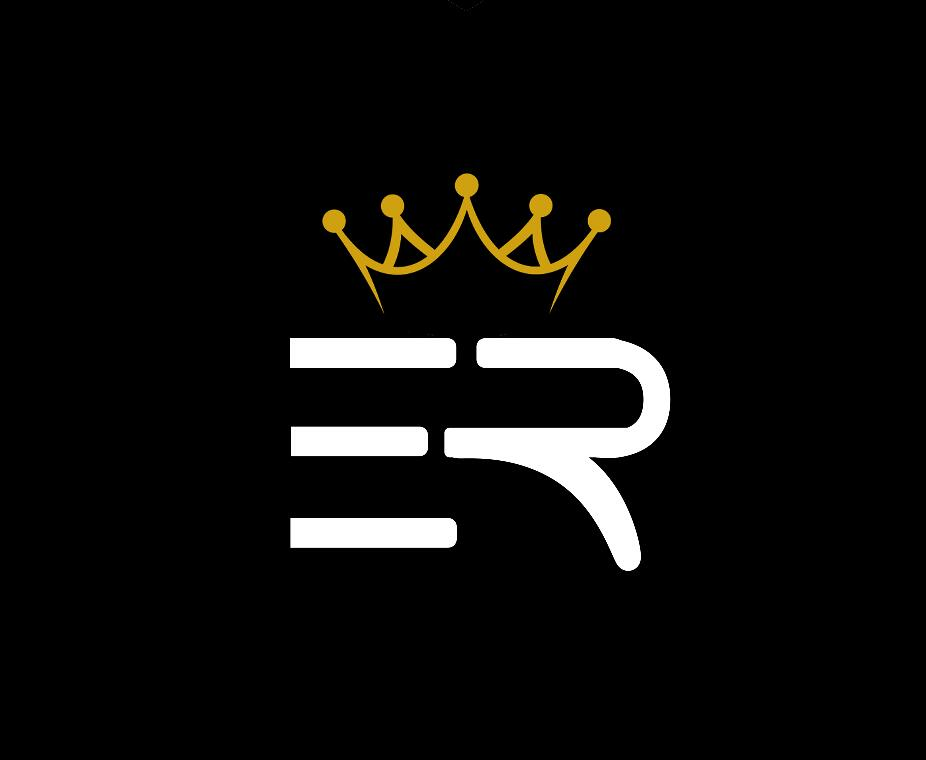